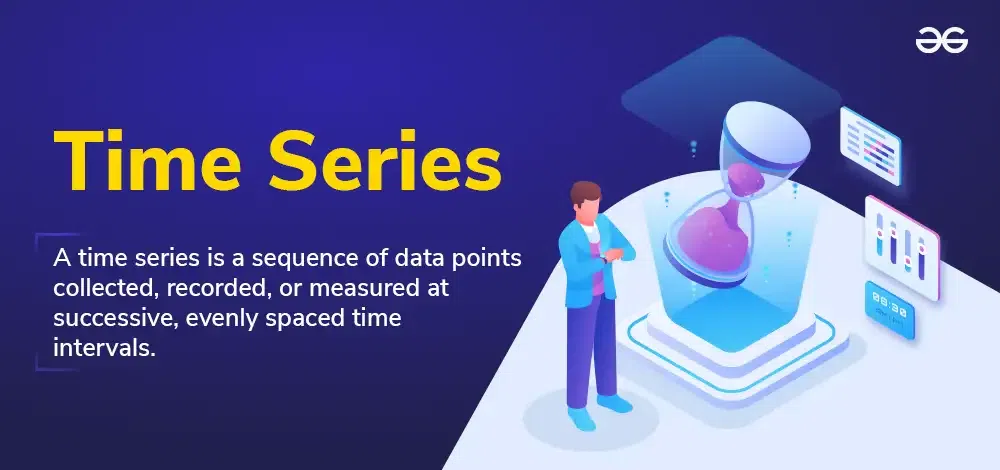
### Univariate LSTM Models
### **1. Data understanding**
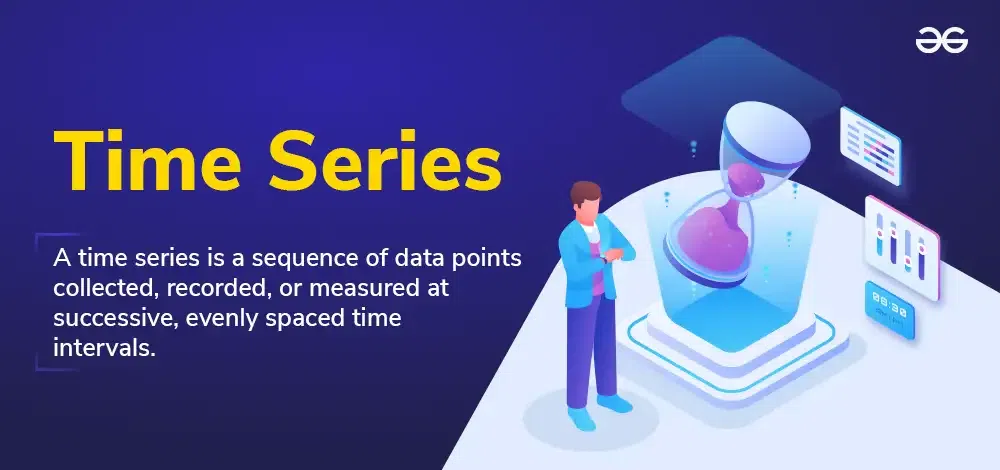

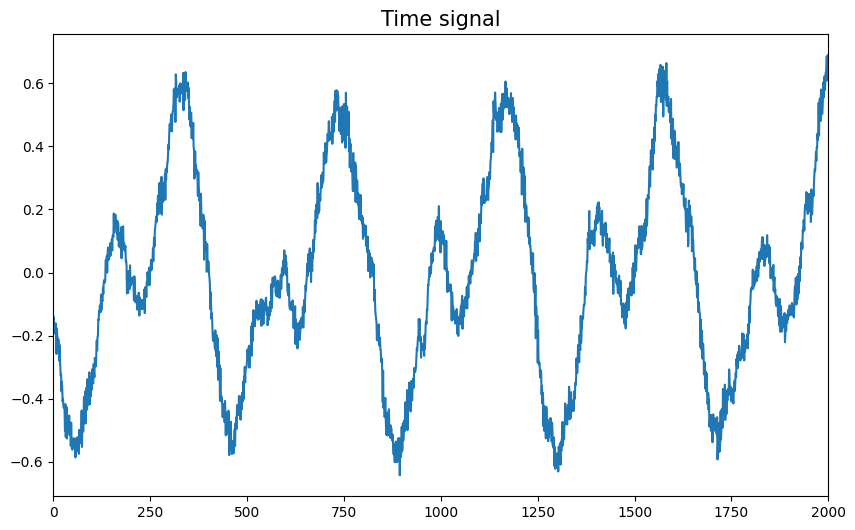

In [1]:
import pickle
import matplotlib.pyplot as plt

# Load data using pickle
with open('/kaggle/input/time-signal/time_signal.pkl', 'rb') as file:
    data = pickle.load(file)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Time signal', fontsize=15)
plt.plot(data[0:2000])
plt.xlim(0, 2000)
plt.show()


### **2. Data preparation**

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [3]:
# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


### 3. Vanilla LSTM
##### The Vanilla LSTM model is the basic LSTM architecture, typically used for time series forecasting. Steps: Model Definition: A simple LSTM layer followed by a Dense layer to output the forecast. Compile and Train the Model: Choose a loss function like mean_squared_error and an optimizer like Adam.

In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# define model
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Fit the model
history = model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.232544]]


#### **Evalutation**

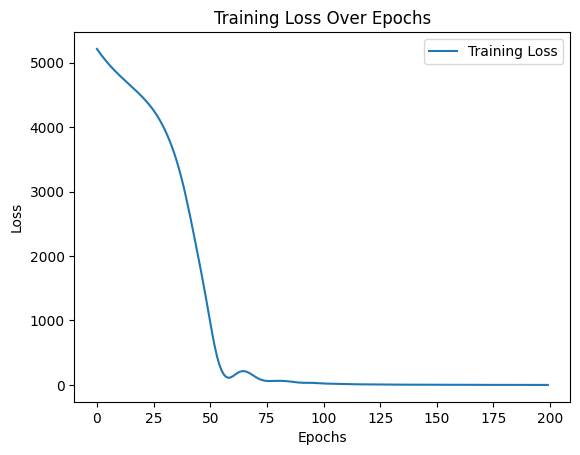

In [6]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

==> The graph shows the training loss decreasing over the epochs, which indicates that the model is learning from the data. Here’s an interpretation:

Steep Drop Initially: The loss decreases rapidly in the early epochs. This is common as the model starts to fit the training data.
Plateauing Loss: After around 50 epochs, the loss begins to stabilize and converges to a lower value, indicating that the model has reached a near-optimal solution for the training data.

#### 4. Stacked LSTM

In [7]:
# define model
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [8]:
# fit model
K = model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[103.65812]]


#### Evaluation

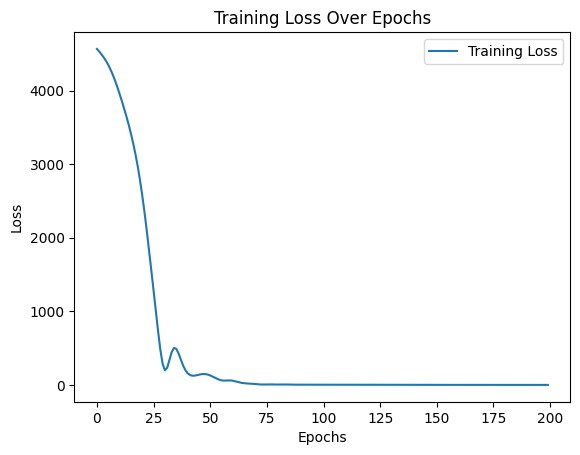

In [9]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(K.history['loss'], label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

==> The graph shows the training loss decreasing over the epochs, which indicates that the model is learning from the data. Here’s an interpretation:

Steep Drop Initially: The loss decreases rapidly in the early epochs. This is common as the model starts to fit the training data.
Plateauing Loss: After around 25 epochs, the loss begins to stabilize and converges to a lower value, indicating that the model has reached a near-optimal solution for the training data.

#### 5. Bidirectional LSTM

In [10]:
from keras.layers import Bidirectional
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
C= model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[100.567276]]


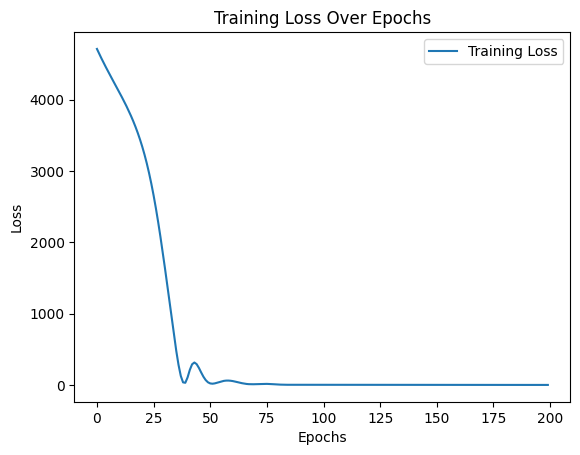

In [11]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(C.history['loss'], label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### 6. CNN LSTM

In [12]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D

In [13]:
# Choose a number of time steps
n_steps = 4
X, y = split_sequence(raw_seq, n_steps)

# Reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1  # Univariate data
n_seq = 2       # Number of subsequences
n_steps = 2     # Timesteps per subsequence
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [14]:
# Define the CNN-LSTM model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Fit the model
A = model.fit(X, y, epochs=500, verbose=0)

# Demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.14253]]


#### Evaluation

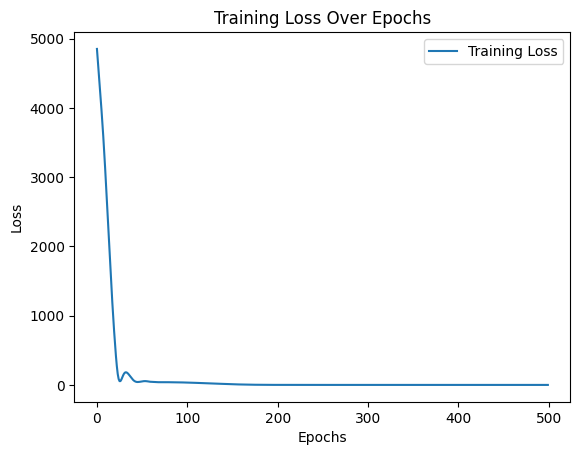

In [16]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(A.history['loss'], label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### 7. ConvLSTM

In [17]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

In [18]:
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
# fit model
F = model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.45283]]


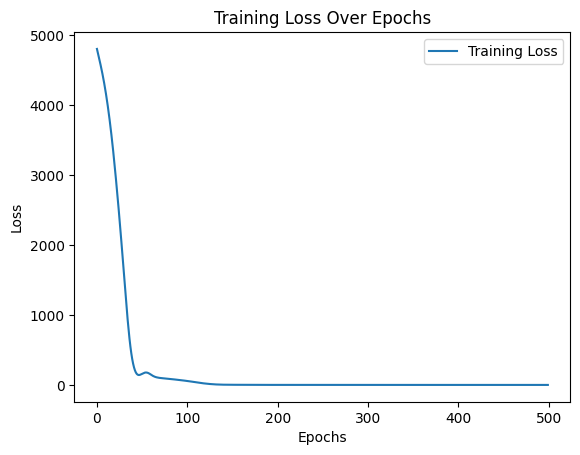

In [20]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(F.history['loss'], label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()